# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

In [134]:

netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [135]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Посмотрим что-нибудь по рейтингам

In [136]:
# Выборка по фильмам
movies = netflix[ (netflix['type'] == 'Movie') ]

In [137]:
# Выборка по сериалам
tv_show = netflix[ (netflix['type'] == 'TV Show') ]

In [138]:
# Уникальные значения рейтинга
tv_show['rating'].unique()

array(['TV-Y7-FV', 'TV-Y7', 'TV-MA', 'TV-14', 'TV-PG', 'TV-Y', 'TV-G',
       'NR', 'G', nan, 'R', 'PG'], dtype=object)

In [139]:
# Сколько сериалов по каждому рейтингу
tvs_rating_count=tv_show['rating'].value_counts().head(20)

In [140]:
tvs_rating_count

TV-MA       679
TV-14       660
TV-PG       269
TV-Y        102
TV-Y7       100
TV-G         69
TV-Y7-FV     68
NR           16
R             2
G             1
PG            1
Name: rating, dtype: int64

In [141]:
# Переводим таблицу из Series в DF
tvs_rating_count = tvs_rating_count.to_frame().reset_index()

In [142]:
# Меняем название заголовков
tvs_rating_count.columns = ['rating','s_count']

In [143]:
# Сортирую по количеству, выборка от большего к меньшему
tvs_rating_count=tvs_rating_count.sort_values('s_count', ascending=True)

Text(0.5, 1.0, 'Number of TV show by ratings')

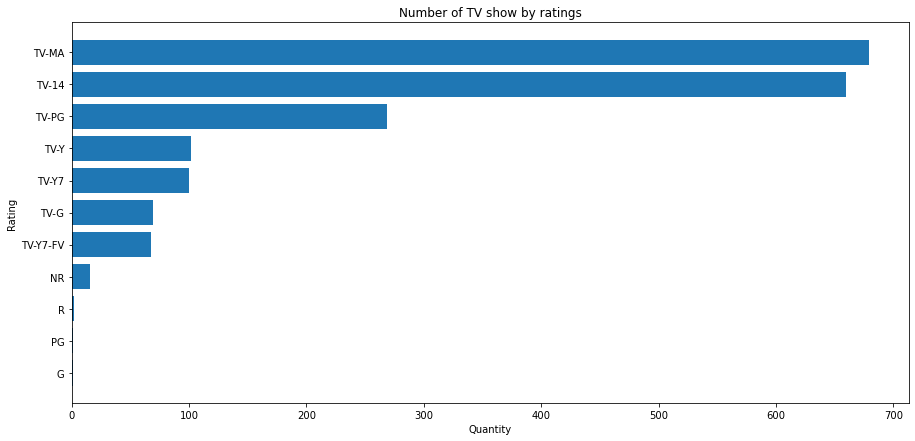

In [144]:
# Выводим график
plt.barh(tvs_rating_count['rating'], tvs_rating_count['s_count'])
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.title('Number of TV show by ratings')
# plt.text(20000, 0.5, 'Most common name')
# plt.grid()

In [145]:
movies_rating_count=movies['rating'].value_counts().head(20)

In [146]:
movies_rating_count = movies_rating_count.to_frame().reset_index()
movies_rating_count.columns = ['rating','m_count']
movies_rating_count=movies_rating_count.sort_values('m_count', ascending=True)

Text(0.5, 1.0, 'Number of Movies by ratings')

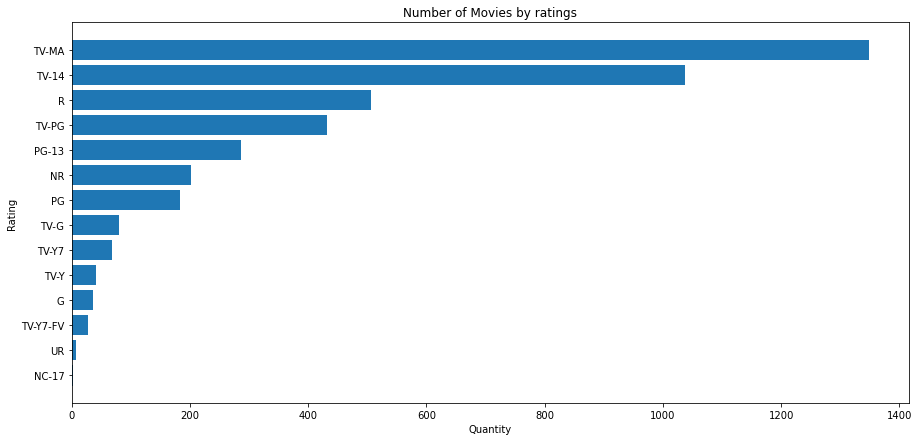

In [147]:
plt.barh(movies_rating_count['rating'], movies_rating_count['m_count'])
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.title('Number of Movies by ratings')

In [148]:
tvs_rating_count


,rating,s_count
9,G,1
10,PG,1
8,R,2
7,NR,16
6,TV-Y7-FV,68
5,TV-G,69
4,TV-Y7,100
3,TV-Y,102
2,TV-PG,269
1,TV-14,660


In [79]:
movies_rating_count

,rating,m_count
13,NC-17,2
12,UR,7
11,TV-Y7-FV,27
10,G,36
9,TV-Y,41
8,TV-Y7,69
7,TV-G,80
6,PG,183
5,NR,202
4,PG-13,286


In [80]:
# Объединение двух таблиц по столбцу "Рейтинг"
tvs_movies_count = tvs_rating_count.merge(movies_rating_count, how = 'left', left_on='rating', right_on='rating')

In [81]:
tvs_movies_count

,rating,s_count,m_count
0,G,1,36
1,PG,1,183
2,R,2,506
3,NR,16,202
4,TV-Y7-FV,68,27
5,TV-G,69,80
6,TV-Y7,100,69
7,TV-Y,102,41
8,TV-PG,269,432
9,TV-14,660,1038


Text(0.5, 1.0, 'Number of TV show and Movies by ratings')

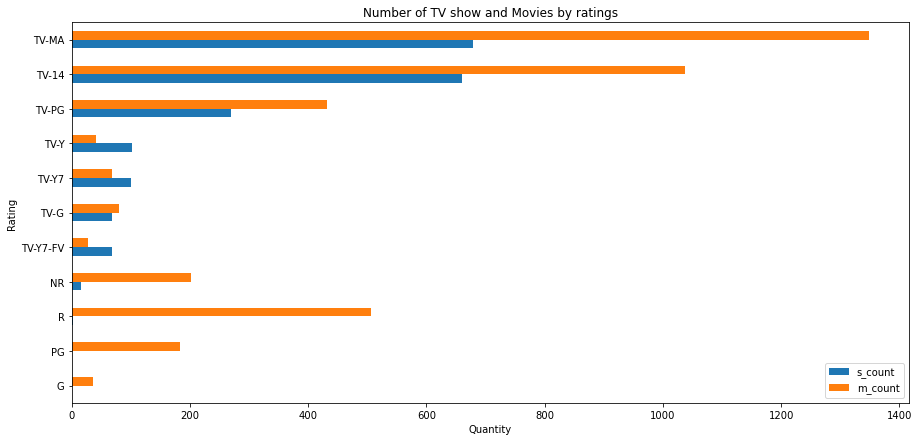

In [82]:
tvs_movies_count.plot.barh(x='rating')
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.title('Number of TV show and Movies by ratings')


Проверим сколько фильмов и сколько сериалов снимали в разные года

In [21]:
netflix['release_year'].value_counts().head(20)

2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
2009     121
2008     107
2007      71
2006      68
2005      63
2004      49
2003      43
2002      38
2001      34
2000      31
Name: release_year, dtype: int64

In [22]:
netflix['release_year'].unique()

array([2019, 2016, 2013, 2017, 2014, 2015, 2009, 2012, 2010, 2018, 2011,
       2004, 2000, 1983, 1982, 2006, 2005, 2002, 1997, 2008, 2007, 2003,
       1981, 1991, 1994, 1988, 1976, 1973, 1974, 1989, 1986, 1984, 1978,
       1998, 1972, 1979, 1960, 1959, 2001, 1995, 1992, 1990, 1975, 1985,
       1980, 1970, 1996, 1967, 1999, 1987, 1968, 1993, 2020, 1958, 1965,
       1956, 1962, 1955, 1977, 1945, 1946, 1942, 1944, 1947, 1943, 1969,
       1954, 1966, 1971, 1964, 1925, 1963], dtype=int64)

In [23]:
year_type_stats = netflix.filter(items = ['type', 'release_year'])
year_type_stats

,type,release_year
0,Movie,2019
1,Movie,2016
2,TV Show,2013
3,TV Show,2016
4,Movie,2017
...,...,...
6229,TV Show,2015
6230,TV Show,2016
6231,Movie,2016
6232,TV Show,2013


In [24]:
def groupby_funct(data):
    return year_type_stats['release_year'].count()

In [25]:
year_type_stats.groupby('release_year').apply(groupby_funct)

release_year
1925    6234
1942    6234
1943    6234
1944    6234
1945    6234
        ... 
2016    6234
2017    6234
2018    6234
2019    6234
2020    6234
Length: 72, dtype: int64

In [26]:
year_type_stats = year_type_stats.sort_values(by='release_year').head()

In [50]:
year_type_stats = year_type_stats.reset_index()

In [60]:
year_type_stats = year_type_stats.sort_values('release_year', ascending=False)

In [61]:
year_type_stats

,type,release_year
3467,TV Show,2020
3249,Movie,2020
3220,TV Show,2020
3427,Movie,2020
3436,TV Show,2020
...,...,...
2023,Movie,1943
2022,Movie,1943
2013,Movie,1942
2011,Movie,1942


In [64]:
movies_ = year_type_stats[ (year_type_stats['type'] == 'Movie') ]

In [66]:
myc = movies_['release_year'].value_counts()

In [70]:
myc = myc.to_frame()
myc = myc.reset_index()
myc.columns = ['year', 'count']
myc

,year,count
0,2017,682
1,2018,646
2,2016,593
3,2019,400
4,2015,363
...,...,...
65,1947,1
66,1955,1
67,1959,1
68,1964,1


In [67]:
tvshow = year_type_stats[ (year_type_stats['type'] == 'TV Show') ]

In [68]:
tvsyc = tvshow['release_year'].value_counts()

In [71]:
tvsyc = tvsyc.to_frame()
tvsyc = tvsyc.reset_index()
tvsyc.columns = ['year', 'count']
tvsyc

,year,count
0,2019,443
1,2018,417
2,2017,277
3,2016,237
4,2015,154
5,2014,75
6,2013,60
7,2012,58
8,2010,38
9,2011,36


In [72]:
data = myc.merge(tvsyc, on='year', how = 'left')

In [90]:
data.columns = ['year', 'movies_count', 'tvshow_count']
data = data.fillna(0)
data['tvshow_count'] = data.tvshow_count.astype('int64')


In [91]:
data = data.sort_values('year', ascending=False)

In [92]:
data

,year,movies_count,tvshow_count
0,2020,6,19
1,2019,400,443
2,2018,646,417
3,2017,682,277
4,2016,593,237
...,...,...,...
65,1946,2,1
66,1945,3,0
67,1944,3,0
68,1943,3,0


In [106]:
data_ = data[[x for x in data.columns if 'count' in x] + ['year']]\
    .groupby('year').sum()
data_

,movies_count,tvshow_count
year,,
1942,2,0
1943,3,0
1944,3,0
1945,3,0
1946,2,1
...,...,...
2016,593,237
2017,682,277
2018,646,417


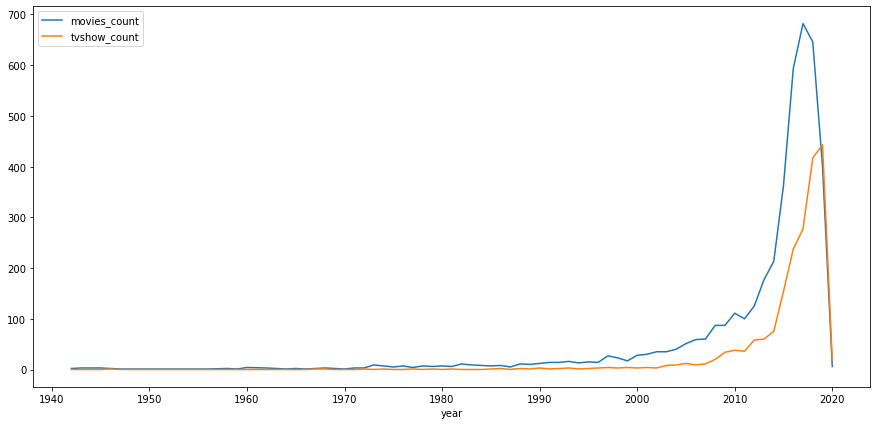

In [114]:
data_.plot()

C 1990-х рост производства фильмов, с 2000-х рост сериалов

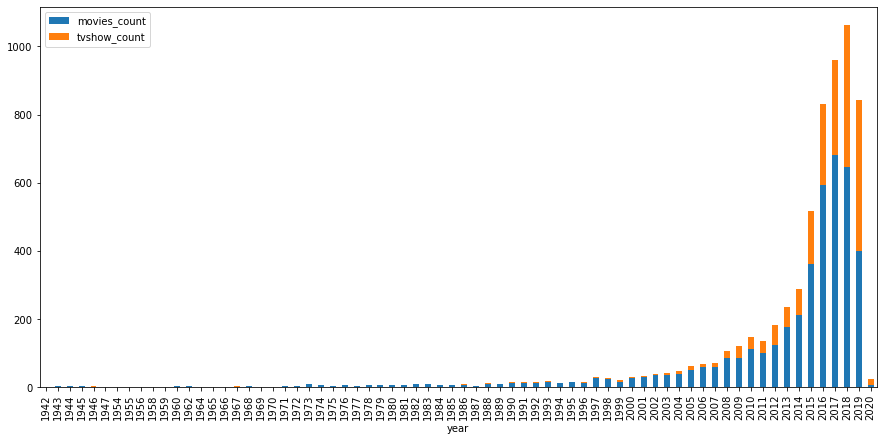

In [115]:
data_.plot(kind='bar', rot=90, stacked=True)

##Увеличение производста сериалов и уменьшение производства фильмов с 2017 года##

netflix.groupby('release_year').count()[['title']]

In [32]:
n_type = netflix[['release_year', 'type']]

In [33]:
n_type

,release_year,type
0,2019,Movie
1,2016,Movie
2,2013,TV Show
3,2016,TV Show
4,2017,Movie
...,...,...
6229,2015,TV Show
6230,2016,TV Show
6231,2016,Movie
6232,2013,TV Show


In [35]:
n_type['values'] = 1

<ipython-input-35-873fdd5489f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_type['values'] = 1


In [31]:

# Лекция Пандас 2 время 33 мнуты(про сводные таблицы)
# purchases_pivot = purchases.pivot_table(index='user_id', columns='category', values='user_id', 
#                                         aggfunc='size', fill_value=0)
# purchases_pivot

,release_year,type,values
0,2019,Movie,1
1,2016,Movie,1
2,2013,TV Show,1
3,2016,TV Show,1
4,2017,Movie,1
...,...,...,...
6229,2015,TV Show,1
6230,2016,TV Show,1
6231,2016,Movie,1
6232,2013,TV Show,1


In [149]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [150]:
netflix_pivot = netflix.pivot_table(index='rating', columns='release_year', values='type',aggfunc=len, margins=True, 
                       dropna=True, fill_value=0)

In [151]:
netflix_pivot = netflix_pivot[:-1]

In [152]:
netflix_pivot

release_year,1925,1942,1943,1944,1945,1946,1947,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
rating,,,,,,,,,,,,,,,,,,,,,
G,0,0,0,0,0,0,0,0,0,1,...,1,0,2,0,4,2,1,0,0,37
NC-17,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2
NR,0,0,1,0,0,0,0,0,0,0,...,10,19,24,55,40,4,5,2,0,218
PG,0,0,0,0,0,0,0,0,0,0,...,1,10,9,6,12,11,30,7,0,184
PG-13,0,0,0,0,0,0,0,0,1,0,...,7,7,10,21,18,22,19,10,0,286
R,0,0,0,0,0,0,0,0,0,0,...,20,28,39,54,66,47,24,24,0,508
TV-14,0,0,1,1,2,1,1,0,0,0,...,64,67,79,153,228,279,291,211,5,1698
TV-G,0,1,0,0,0,0,0,1,0,0,...,4,11,12,14,21,25,15,25,1,149
TV-MA,0,0,0,0,1,0,0,0,0,0,...,38,49,55,126,282,400,491,412,17,2027


In [153]:
name = list(netflix_pivot)
for n in name:
    netflix_pivot[n] = (netflix_pivot[n]/sum(netflix_pivot[n])) * 100

In [154]:
netflix_pivot['All'] = (netflix_pivot['All']/sum(netflix_pivot['All'])) * 100

release_year,1925,1942,1943,1944,1945,1946,1947,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
rating,,,,,,,,,,,,,,,,,,,,,
G,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,100.0,...,0.546448,0.000000,0.694444,0.000000,0.482509,0.208986,0.094073,0.000000,0.0,0.594473
NC-17,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.423729,0.000000,0.000000,0.000000,0.000000,0.094073,0.000000,0.0,0.032134
NR,0.0,0.0,33.333333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,5.464481,8.050847,8.333333,10.742188,4.825090,0.417973,0.470367,0.237248,0.0,3.502571
PG,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.546448,4.237288,3.125000,1.171875,1.447527,1.149425,2.822201,0.830368,0.0,2.956298
PG-13,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,100.0,0.0,...,3.825137,2.966102,3.472222,4.101562,2.171291,2.298851,1.787394,1.186240,0.0,4.595116
R,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,10.928962,11.864407,13.541667,10.546875,7.961399,4.911181,2.257761,2.846975,0.0,8.161954
TV-14,0.0,0.0,33.333333,33.333333,66.666667,33.333333,100.0,0.0,0.0,0.0,...,34.972678,28.389831,27.430556,29.882812,27.503016,29.153605,27.375353,25.029656,20.0,27.281491
TV-G,0.0,50.0,0.000000,0.000000,0.000000,0.000000,0.0,100.0,0.0,0.0,...,2.185792,4.661017,4.166667,2.734375,2.533172,2.612330,1.411101,2.965599,4.0,2.393959
TV-MA,0.0,0.0,0.000000,0.000000,33.333333,0.000000,0.0,0.0,0.0,0.0,...,20.765027,20.762712,19.097222,24.609375,34.016888,41.797283,46.190028,48.873072,68.0,32.567481


In [156]:
import seaborn as sns

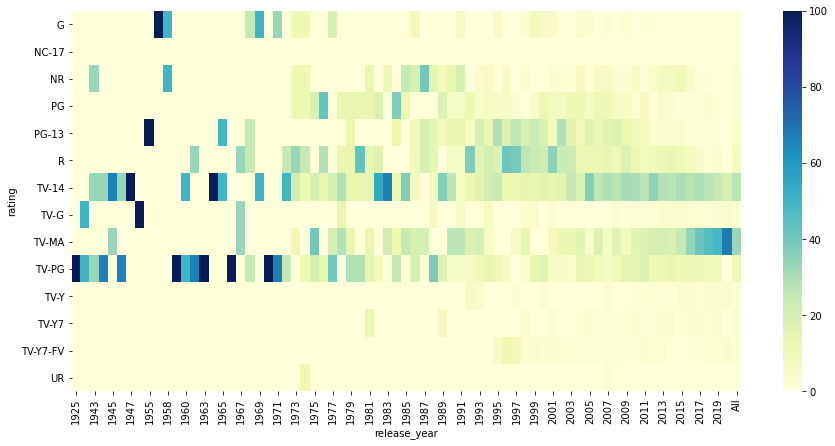

In [157]:
netflixt_rating = sns.heatmap(netflix_pivot, cmap="YlGnBu")


С 2015 года растет кино-сериальных продуктов с TV-MA(Тип программ, предназначенный для взрослых людей и не рекомендуется детям до 17 лет.)
И более медлено TV-14(Тип программ, содержащей материалы, не подходящие для детей в возрасте до 14 лет.)